In [6]:
import netCDF4 as nc
import numpy as np
import matplotlib.pylab as py
from sklearn.linear_model import LinearRegression
from numpy.polynomial import polynomial as P

In [7]:
filename = r'C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\2021.03.29.CMIP6_4brptCO2_tas\piControl\tas_glob_piControl.nc'
dss = nc.Dataset(filename)
#print(dss['tasglob'])
taspi = dss['tasglob'][:]
taspim = np.average(taspi,axis=1)
print(taspim)
filename = r'C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\2021.03.29.CMIP6_4brptCO2_tas\tas_glob_abpt4CO2.nc'
ds = nc.Dataset(filename)
#print(ds)
for dim in ds.dimensions.values():
    print(dim)
#print(ds['tasglob'])
tas0 = ds['tasglob'][:]
Y = [0, 1, 2, 3, 4, 6, 7]
tas = tas0[Y,:]
taspim0 = taspim[Y]
print(taspim0)
tas00 = tas0[Y,:] #original air temperature
#print(tas00)
for nn in range(0,7):
    tas[nn,:] = tas[nn,:]-taspim0[nn]

#print(np.average(tas))
date1 = np.arange(0.5, 150.5, 1.0)
#print(date1)

[287.81653 286.36426 287.24673 286.7132  285.7067  286.7494  286.5905
 286.706  ]
<class 'netCDF4._netCDF4.Dimension'>: name = 'ncl0', size = 8
<class 'netCDF4._netCDF4.Dimension'>: name = 'ncl1', size = 150
[287.81653 286.36426 287.24673 286.7132  285.7067  286.5905  286.706  ]


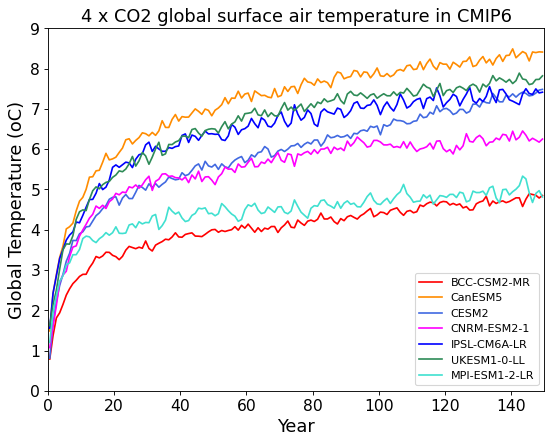

In [8]:
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["BCC-CSM2-MR","CanESM5","CESM2","CNRM-ESM2-1","IPSL-CM6A-LR","UKESM1-0-LL","MPI-ESM1-2-LR"]
colorname= ["red","darkorange","royalblue","magenta","blue","seagreen","turquoise"]
for nn in range(0,7):
  py.plot(date1, tas[nn,:], color= colorname[nn], label= labname[nn])
py.legend(loc="lower right")
py.title("4 x CO2 global surface air temperature in CMIP6",fontsize=16)
py.xlim(0,150)
py.ylim(0,9)
py.ylabel("Global Temperature (oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

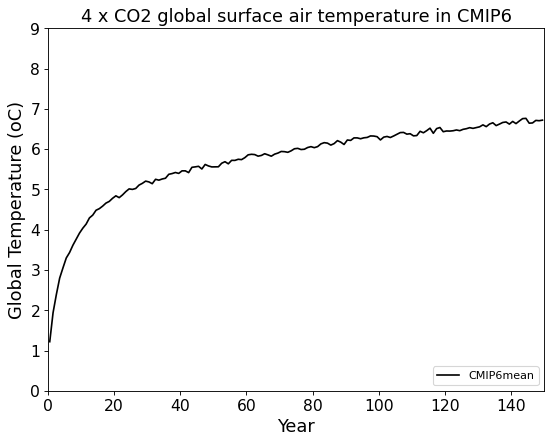

In [9]:
#print(tas)
tasmmm = np.average(tas[:,:],axis=0)
#print(tasmmm)
py.figure(1,figsize=(8, 6), dpi=80)
py.plot(date1, tasmmm, color= 'black', label= 'CMIP6mean')
py.legend(loc="lower right")
py.title("4 x CO2 global surface air temperature in CMIP6",fontsize=16)
py.xlim(0,150)
py.ylim(0,9)
py.ylabel("Global Temperature (oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

[ 0.51961371  0.47959172 -0.05218341  0.00225736]


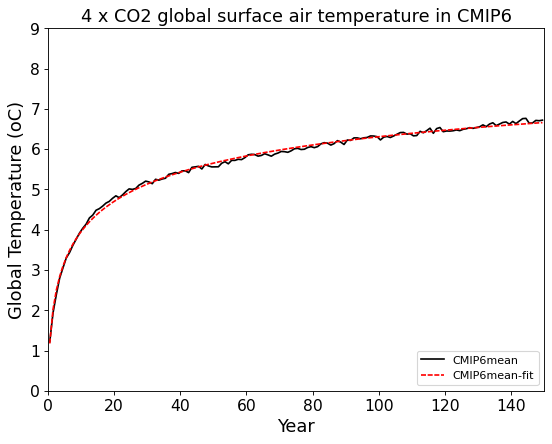

In [11]:
# get the curve fit regression parameters
t          = np.arange(0.5, 150.5, 1.0) # time in years
impulselen = len(t)
t          = np.log(t)
tasresponse = np.log(tasmmm)
K = P.polyfit(t,tasresponse,3)
print(K)
tresponse  = np.exp(K[0] + K[1]*t + K[2]*t**2 + K[3]*t**3) #fit to powerpoint curv

py.figure(1,figsize=(8, 6), dpi=80)
py.plot(date1, tasmmm, color= 'black', label= 'CMIP6mean')
py.plot(date1, tresponse, color= 'red', dashes = [3,1], label= 'CMIP6mean-fit')
py.legend(loc="lower right")
py.title("4 x CO2 global surface air temperature in CMIP6",fontsize=16)
py.xlim(0,150)
py.ylim(0,9)
py.ylabel("Global Temperature (oC)",fontsize=16)
py.xlabel("Year", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

\begin{equation}
N = F + \lambda \Delta T
\end{equation}
Based on the equation above, compute the TOA energy imblance regression with $\Delta T$
TOA energy imbalance N, $\Delta T$ is derived from all 150 years simulation
They have been regressed against each other as shown below to compuate Equilibrium Climate Sensitivity (ECS)

In [43]:
filename1 = r'C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\2021.03.29.CMIP6_4brptCO2_tas\rsdt_glob_abpt4CO2.nc'
filename2 = r'C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\2021.03.29.CMIP6_4brptCO2_tas\rsut_glob_abpt4CO2.nc'
filename3 = r'C:\Users\liyue\Desktop\Scientific Career\Publication materials\tcre\2021.03.29.CMIP6_4brptCO2_tas\rlut_glob_abpt4CO2.nc'
ds1 = nc.Dataset(filename1)
ds2 = nc.Dataset(filename2)
ds3 = nc.Dataset(filename3)

rad0 = ds1['rsdtglob'][:]
Y = [0, 1, 2, 3, 4, 6, 7]
rsdt = rad0[Y,:]
rad0 = ds2['rsutglob'][:]
rsut = rad0[Y,:]
rad0 = ds3['rlutglob'][:]
rlut = rad0[Y,:]
netrad = rsdt-rsut-rlut

Equilibrium climate sensitivity (ECS) for  BCC-CSM2-MR :
2.6558597571193894
Equilibrium climate sensitivity (ECS) for  CanESM5 :
5.840174756028123
Equilibrium climate sensitivity (ECS) for  CESM2 :
5.669043007218433
Equilibrium climate sensitivity (ECS) for  CNRM-ESM2-1 :
5.931310314467621
Equilibrium climate sensitivity (ECS) for  IPSL-CM6A-LR :
5.07302085375205
Equilibrium climate sensitivity (ECS) for  UKESM1-0-LL :
5.31937581426492
Equilibrium climate sensitivity (ECS) for  MPI-ESM1-2-LR :
3.155045846177935


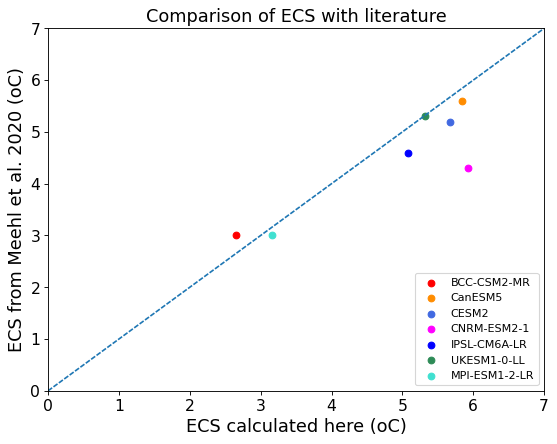

In [44]:
# Gregory regression
labname= ["BCC-CSM2-MR","CanESM5","CESM2","CNRM-ESM2-1","IPSL-CM6A-LR","UKESM1-0-LL","MPI-ESM1-2-LR"]
regall = np.zeros((7,2))
for nn in range(0,7):
  reg = LinearRegression().fit(tas[nn,:].reshape((150,1)),netrad[nn,:].reshape((150,1)))
  regall[nn,0] = reg.coef_  # a*X0+b
  regall[nn,1] = reg.intercept_
#print(regall)

x0 = np.arange(0.,12.1,1)
yy0 = np.arange(0.,12.1,1)
y0 = np.zeros((7,13))
ECS1 = np.zeros(7)
for nn in range(0,7):
  y0[nn,:] = x0*regall[nn,0]+regall[nn,1]
  print("Equilibrium climate sensitivity (ECS) for ",labname[nn],":")
  print(regall[nn,1]*-1/regall[nn,0]/2)
  ECS1[nn] = regall[nn,1]*-1/regall[nn,0]/2
ECS2 = [3.0, 5.6, 5.2, 4.3, 4.6, 5.3, 3.0]
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["BCC-CSM2-MR","CanESM5","CESM2","CNRM-ESM2-1","IPSL-CM6A-LR","UKESM1-0-LL","MPI-ESM1-2-LR"]
colorname= ["red","darkorange","royalblue","magenta","blue","seagreen","turquoise"]
for nn in range(0,7):
  py.scatter(ECS1[nn],ECS2[nn], color= colorname[nn], label= labname[nn])
py.plot(x0,yy0,dashes=[3,1])
py.legend(loc="lower right")
py.title("Comparison of ECS with literature",fontsize=16)
py.xlim(0,7)
py.ylim(0,7)
py.xlabel("ECS calculated here (oC)",fontsize=16)
py.ylabel("ECS from Meehl et al. 2020 (oC)", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()
#print(y0)

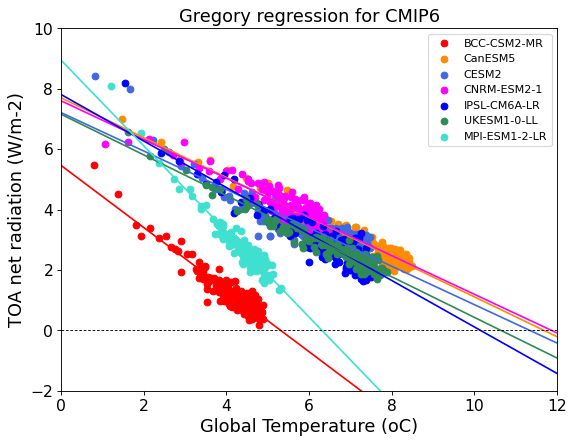

In [45]:
# plot the d_N vs d_T
#print(tas)
py.figure(1,figsize=(8, 6), dpi=80)
labname= ["BCC-CSM2-MR","CanESM5","CESM2","CNRM-ESM2-1","IPSL-CM6A-LR","UKESM1-0-LL","MPI-ESM1-2-LR"]
colorname= ["red","darkorange","royalblue","magenta","blue","seagreen","turquoise"]
for nn in range(0,7):
  py.scatter(tas[nn,:],netrad[nn,:], color= colorname[nn], label= labname[nn])
  py.plot(x0,y0[nn,:],color= colorname[nn] )
py.legend(loc="upper right")
py.title("Gregory regression for CMIP6",fontsize=16)
py.axhline(y=0,color ="black",dashes=[3,2],linewidth=0.8)
py.xlim(0,12)
py.ylim(-2, 10)
py.xlabel("Global Temperature (oC)",fontsize=16)
py.ylabel("TOA net radiation (W/m-2)", fontsize=16)
py.rc("xtick",labelsize=14)
py.rc("ytick",labelsize=14)
py.show()

Based on the assumed T & RF relationship:
\begin{equation}
\Delta T = \lambda RF
\end{equation}
The $\lambda$ for each of these CMIP6 models is:

In [ ]:
# first, compute the RF of CO2